In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import tensorflow as tf
from tensorflow import keras
import warnings
warnings.filterwarnings("ignore")

In [4]:
# Hight and width of the images
IMAGE_SIZE = 32
# 3 channels, Red, Green and Blue
CHANNELS = 3
# Number of epochs
NUM_EPOCH = 350
# learning rate
LEARN_RATE = 1.0e-4

In [5]:
from keras.datasets import cifar10

Using TensorFlow backend.


In [6]:
(X_train , y_train) , (X_test , y_test) = cifar10.load_data()

In [7]:
classes_name = ['airplane' , 'automobile' , 'bird' , 'cat' , 'deer' , 'dog' , 'frog' , 'horse' , 'ship' , 'truck']

In [8]:
print(X_train.shape , y_train.shape , X_test.shape , y_test.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


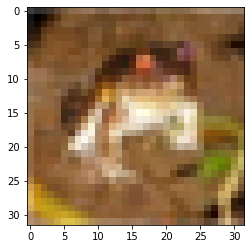

In [9]:
plt.imshow(X_train[0])

In [10]:
X_train.max()

255

In [11]:
X_train.min()

0

In [12]:
X_train = X_train/255
X_test = X_test/255

Building the CNN

In [13]:
from keras.layers import Flatten , Dense , Dropout , Conv2D , MaxPool2D , BatchNormalization
from keras import Sequential

In [14]:
def My_model():
    model = Sequential()

    # Convolutional Layer
    model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    # Pooling layer
    model.add(MaxPool2D(pool_size=(2, 2)))
    # Dropout layers
    model.add(Dropout(0.25))

    model.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(filters=128, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=128, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    # model.add(Dropout(0.2))
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(10, activation='softmax'))
    return model


In [15]:
model = My_model()

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)       

In [17]:
model.compile(optimizer = 'adam' , loss = 'sparse_categorical_crossentropy' , metrics = ['sparse_categorical_accuracy'])

In [18]:
history = model.fit(X_train , y_train , batch_size = 20 , epochs = 20 , verbose = 1 , validation_data = (X_test , y_test))


Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 432s 9ms/step - loss: 1.4284 - sparse_categorical_accuracy: 0.4986 - val_loss: 1.2200 - val_sparse_categorical_accuracy: 0.5850
Epoch 2/20
50000/50000 [==============================] - 449s 9ms/step - loss: 1.0035 - sparse_categorical_accuracy: 0.6496 - val_loss: 1.1423 - val_sparse_categorical_accuracy: 0.6282
Epoch 3/20
50000/50000 [==============================] - 547s 11ms/step - loss: 0.8408 - sparse_categorical_accuracy: 0.7120 - val_loss: 0.7498 - val_sparse_categorical_accuracy: 0.7455
Epoch 4/20
50000/50000 [==============================] - 436s 9ms/step - loss: 0.7500 - sparse_categorical_accuracy: 0.7456 - val_loss: 0.7413 - val_sparse_categorical_accuracy: 0.7567
Epoch 5/20
50000/50000 [==============================] - 416s 8ms/step - loss: 0.6758 - sparse_categorical_accuracy: 0.7705 - val_loss: 0.7227 - val_sparse_categorical_accuracy: 0.7591
Epoch 6/20
50000/5

In [19]:
print(history.history.keys())

dict_keys(['val_loss', 'val_sparse_categorical_accuracy', 'loss', 'sparse_categorical_accuracy'])


In [20]:
score = history.history
print(score['val_sparse_categorical_accuracy'][19]*100)

84.82000231742859


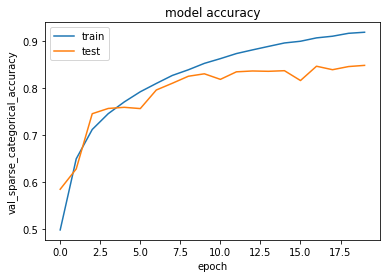

In [21]:
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('val_sparse_categorical_accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

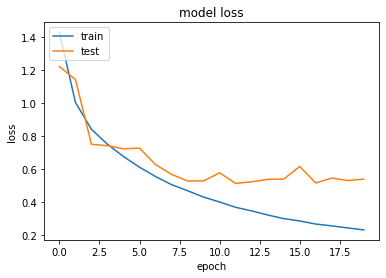

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [23]:
from keras.preprocessing.image import ImageDataGenerator

In [24]:
datagen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=45,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=False)

datagen.fit(X_train)

In [25]:
augmented_model = My_model()

In [26]:
augmented_model.compile(optimizer = 'adam' , loss = 'sparse_categorical_crossentropy' , metrics = ['sparse_categorical_accuracy'])

In [30]:
history_aug = augmented_model.fit_generator(datagen.flow(X_train, y_train, batch_size = 32),
                    epochs = 20,validation_data= (X_test, y_test),verbose=1)

Epoch 1/20
1563/1563 [==============================] - 396s 253ms/step - loss: 1.8018 - sparse_categorical_accuracy: 0.3553 - val_loss: 1.6382 - val_sparse_categorical_accuracy: 0.4060
Epoch 2/20
1563/1563 [==============================] - 388s 248ms/step - loss: 1.4811 - sparse_categorical_accuracy: 0.4679 - val_loss: 1.6678 - val_sparse_categorical_accuracy: 0.4498
Epoch 3/20
1563/1563 [==============================] - 388s 248ms/step - loss: 1.3455 - sparse_categorical_accuracy: 0.5192 - val_loss: 1.3099 - val_sparse_categorical_accuracy: 0.5504
Epoch 4/20
1563/1563 [==============================] - 386s 247ms/step - loss: 1.2450 - sparse_categorical_accuracy: 0.5600 - val_loss: 1.2400 - val_sparse_categorical_accuracy: 0.5674
Epoch 5/20
1563/1563 [==============================] - 388s 248ms/step - loss: 1.1678 - sparse_categorical_accuracy: 0.5916 - val_loss: 1.1490 - val_sparse_categorical_accuracy: 0.6124
Epoch 6/20
1563/1563 [==============================] - 385s 247ms/ste

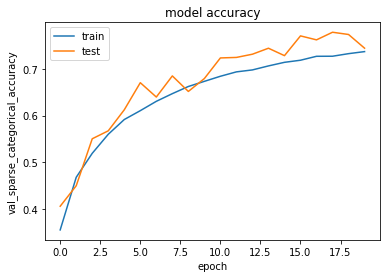

In [34]:
plt.plot(history_aug.history['sparse_categorical_accuracy'])
plt.plot(history_aug.history['val_sparse_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('val_sparse_categorical_accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

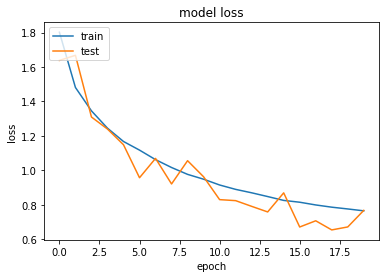

In [35]:
plt.plot(history_aug.history['loss'])
plt.plot(history_aug.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [36]:
aug_score = history_aug.history
print(aug_score['val_sparse_categorical_accuracy'][19]*100)

74.43000078201294
